In [ ]:
#CODIGO REALIZADO POR LUIS NOLASCO RAMIREZ

In [5]:
print('Introducir ciudad deseada en la variable city_name, por defecto Alicante')
print('Se obtendran la temperatura, sensacion termica, humedad, nubes, velocidad y direccion del viento. No se admiten nombres de ciudades compuestos, es decir, solo son validas ciudades cuyo nombre este formado por una unica palabra ')

Introducir ciudad deseada en la variable city_name, por defecto Alicante
Se obtendran la temperatura, sensacion termica, humedad, nubes, velocidad y direccion del viento. No se admiten nombres de ciudades compuestos, es decir, solo son validas ciudades cuyo nombre este formado por una unica palabra 


In [6]:
#Introducir ciudad deseada, por defecto Alicante
city_name = 'Alicante' 
#Se obtendran la temperatura, sensacion termica, humedad, nubes, velocidad y direccion del viento
#No se admiten nombres de ciudades compuestos, es decir, solo son validas ciudades 
#cuyo nombre este formado por una unica palabra

In [9]:
import datetime
import json
import urllib.request
import csv


#Construye la url de la llamada a la API onecall para obtener la predicción de las siguientes 24 horas
def url_builder1(lat,lon):
    user_api = 'a7d98c4cd30be66e3c00580621203170'  # API key del usuario
    unit = 'metric'
    api = 'https://api.openweathermap.org/data/2.5/onecall?lat=' #One Call API url

    full_api_url = api + str(lat) + '&lon=' + str(lon) + '&exclude={part}&appid=' + user_api + '&units=' + unit
    print(full_api_url)
    return full_api_url

#Devuelve los datos de la url en formato json
def data_fetch(full_api_url):
    url = urllib.request.urlopen(full_api_url)
    output = url.read().decode('utf-8')
    raw_api_dict = json.loads(output)
    url.close()
    #print(raw_api_dict)
    return raw_api_dict



if __name__ == '__main__':
    try:
        #Obtencion de las coordenadas de la ciudad deseada
        #Se llama a la API con la API call de current weather que usa el nombre de la ciudad
        #Esta devuelve en uno de sus campos las coordenadas de la ciudad, se extraen y se guardan en dos variables
        url_for_coord = 'https://api.openweathermap.org/data/2.5/weather?q=' + city_name + '&appid=a7d98c4cd30be66e3c00580621203170&units=metric'
        datos_coord = data_fetch(url_for_coord)
        lat = datos_coord['coord']['lat']
        lon = datos_coord['coord']['lon']
        
        
        #Calculo del instante de tiempo actual y su timestamp en UNIX TIME
        now=datetime.datetime.time(datetime.datetime.now())
        timestamp = datetime.datetime.timestamp(datetime.datetime.now())
        
        #Obtencion de los datos de la API en formato json
        datos=data_fetch(url_builder1(lat,lon))
        #print(datos)
        
        #Titulo de cada campo
        file = [["Timestamp","Temp","Feelslike","Humidity","Clouds","WindSpeed","WindDeg"]]

        #Para cada hora
        for i in range(24):
            #Instante de tiempo en formato UNIX de cada hora
            datetime = timestamp + i*3600
            #Se construye la fila completa sacando los datos de llamada a la API y se añade a continuación de la fila anterior
            row = [round(datetime),datos['hourly'][i]['temp'],datos['hourly'][i]['feels_like'],datos['hourly'][i]['humidity'],datos['hourly'][i]['clouds'],datos['hourly'][i]['wind_speed'],datos['hourly'][i]['wind_deg']]
            file.append(row)
        
        
        #Se escribe el archivo csv
        myFile = open('forecast24h.csv','w')
        with myFile:
            writer = csv.writer(myFile)
            writer.writerows(file)   
        print("Writing complete")
        print(file)
        
    except IOError:
        print('error')

https://api.openweathermap.org/data/2.5/onecall?lat=38.3452&lon=-0.4815&exclude={part}&appid=a7d98c4cd30be66e3c00580621203170&units=metric
Writing complete
[['Timestamp', 'Temp', 'Feelslike', 'Humidity', 'Clouds', 'WindSpeed', 'WindDeg'], [1617201906, 18.71, 17.99, 52, 0, 7.48, 81], [1617205506, 18.65, 17.88, 50, 0, 7.52, 77], [1617209106, 18.39, 17.56, 49, 0, 7.58, 75], [1617212706, 17.94, 17.12, 51, 0, 6.55, 72], [1617216306, 17.06, 16.26, 55, 0, 6.23, 70], [1617219906, 16.48, 15.67, 57, 0, 6.19, 66], [1617223506, 16.28, 15.43, 56, 3, 6.41, 60], [1617227106, 16.19, 15.25, 53, 3, 5.88, 51], [1617230706, 16.08, 15.08, 51, 8, 5.76, 47], [1617234306, 15.91, 14.86, 50, 22, 5.44, 45], [1617237906, 15.92, 14.87, 50, 35, 4.83, 42], [1617241506, 15.77, 14.73, 51, 100, 4.9, 43], [1617245106, 15.55, 14.52, 52, 90, 4.4, 39], [1617248706, 15.38, 14.28, 50, 91, 4.33, 21], [1617252306, 15.55, 14.44, 49, 93, 5.08, 29], [1617255906, 15.36, 14.26, 50, 95, 4.76, 36], [1617259506, 15.51, 14.5, 53, 96, 4

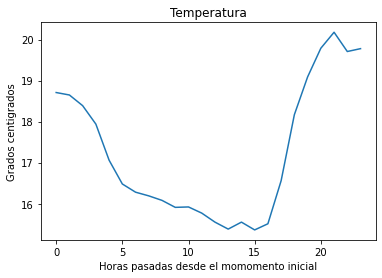

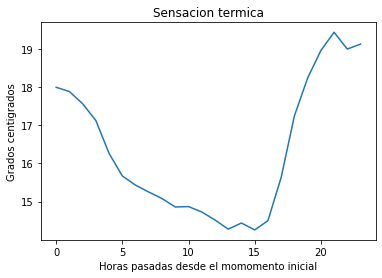

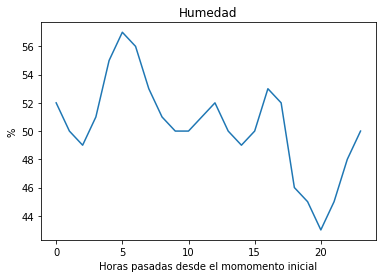

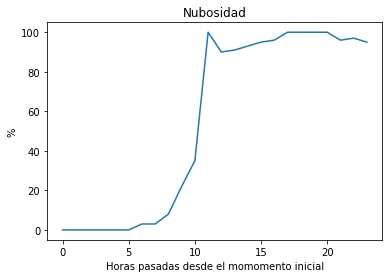

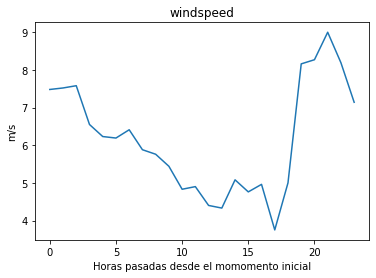

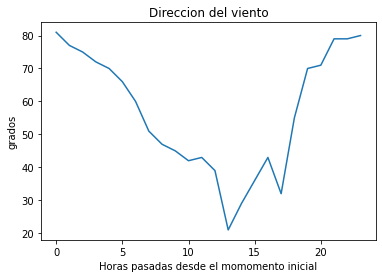

In [11]:
#Grafica de la evolucion de las diferentes variables en las proximas 24 horas
import matplotlib.pyplot as plt
import datetime

temp=[]
feel_like=[]
humidity=[]
clouds=[]
windspeed=[]
winddeg=[]
x=[]
#Se crean 2 vectores para almacenar las coordenadas del eje x y del eje y
#El eje x son la cantidad de horas pasadas desde el momento inicial
#El eje y es la temperatura en cada una de esas horas
for i in range(24):
    temp.append(file[i+1][1])
    feel_like.append(file[i+1][2])
    humidity.append(file[i+1][3])
    clouds.append(file[i+1][4])
    windspeed.append(file[i+1][5])
    winddeg.append(file[i+1][6])
    x.append(i)


plt.title("Temperatura")
plt.xlabel("Horas pasadas desde el momomento inicial")
plt.ylabel("Grados centigrados")
plt.plot(x,temp)
plt.show()
plt.title("Sensacion termica")
plt.xlabel("Horas pasadas desde el momomento inicial")
plt.ylabel("Grados centigrados")
plt.plot(x,feel_like)
plt.show()
plt.title("Humedad")
plt.xlabel("Horas pasadas desde el momomento inicial")
plt.ylabel("%")
plt.plot(x,humidity)
plt.show()
plt.title("Nubosidad")
plt.xlabel("Horas pasadas desde el momomento inicial")
plt.ylabel("%")
plt.plot(x,clouds)
plt.show()
plt.title("windspeed")
plt.xlabel("Horas pasadas desde el momomento inicial")
plt.ylabel("m/s")
plt.plot(x,windspeed)
plt.show()
plt.title("Direccion del viento")
plt.xlabel("Horas pasadas desde el momomento inicial")
plt.ylabel("grados")
plt.plot(x,winddeg)
plt.show()